# Question 2:
In this part of the assignment you will practice putting together a simple machine learning pipeline and to implement the K-nearest neighbor algorithm. You will familiairze yourselves with different python libraries (scikit-learn, matplotlib, pandas) that are helpful tools for machine learning.

## 1. Preparing the data

In this assignment we will use the Iris Flower Species Dataset. This dataset consists of 3 different types of irise species (Setosa, Versicolour, and Virginica) where we have the following measures for each flower sample: the petal length, the sepal length, the petal width, the sepal width.

Below is an example.




![Drag Racing](https://www.integratedots.com/wp-content/uploads/2019/06/iris_petal-sepal-e1560211020463.png)

This data is stored in a 150x4 numpy array, where 150 is the number of sample flowers and 4 is the measured features for each.  Go through the following steps to download the data.

In [142]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()

# We use pandas dataframe to see the table
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [143]:
# Setosa, Versicolour, and Virginica
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

We use pandas dataframe to see the statistics of this data.

In [144]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In this assignment we only use the first two features (sepal length and width) for easier visualization. We also split the dataset into 2 cohorts for training and testing.

In [145]:
from sklearn.model_selection import train_test_split

X = iris.data[:, :4] # The data matrix 
y = iris.target # The class labels

# We take 20% as test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((120, 4), (30, 4))

No handles with labels found to put in legend.


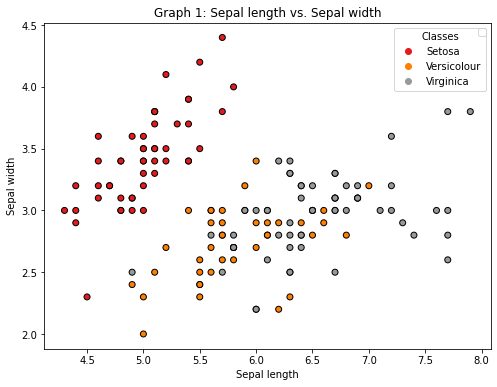

In [160]:
import matplotlib.pyplot as plt

f, axs = plt.subplots(figsize=(8,6))
the_scatter = axs.scatter(X[:, 0], X[:, 1], c=y,
            cmap=plt.cm.Set1, edgecolor='k')

# Change the legend name of the class to be Iris species like Setosa, Versicolour etc...
lines, legend_names = the_scatter.legend_elements()
legend1 = axs.legend(lines, ['Setosa', 'Versicolour', 'Virginica'], title="Classes")
axs.add_artist(legend1)

axs.set_xlabel('Sepal length')
axs.set_ylabel('Sepal width')
axs.set_title('Graph 1: Sepal length vs. Sepal width')
axs.legend()

plt.show()

No handles with labels found to put in legend.


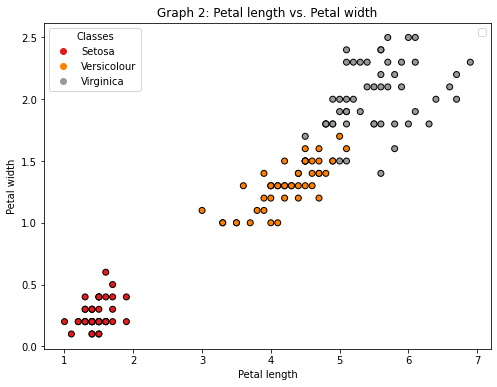

In [161]:
import matplotlib.pyplot as plt

f, axs = plt.subplots(figsize=(8,6))
the_scatter = axs.scatter(X[:, 2], X[:, 3], c=y,
            cmap=plt.cm.Set1, edgecolor='k')

# Change the legend name of the class to be Iris species like Setosa, Versicolour etc...
lines, legend_names = the_scatter.legend_elements()
legend1 = axs.legend(lines, ['Setosa', 'Versicolour', 'Virginica'], title="Classes")
axs.add_artist(legend1)

axs.set_xlabel('Petal length')
axs.set_ylabel('Petal width')
axs.set_title('Graph 2: Petal length vs. Petal width')
axs.legend()

plt.show()

## 2. Implemeting K-Nearest Neighbors
Now we want to implement the K-nearest neighbor algorithm. 

Fill in the code block below for calculating the distance between two vectors.

In [146]:
from math import sqrt
import numpy as np

# calculate the Euclidean distance between two vectors
def euclidean_distance(x1, x2):
    distance = sqrt(np.sum((x2-x1)**2))
    return distance

# This is a helper function to print information on each sample
def print_features(x,y):
    print('Iris type:', ['Setosa', 'Versicolour', 'Virginica'][y-1])
    print('Sepal Length: %.1f \t Sepal Width: %.1f \t Petal Length: %.1f \t Petal Width: %.1f'%(x[0], x[1], x[2], x[3]))   

Then we calculate the euclidean distance to a test example

In [147]:
# We randomly pick a test example
sample = X_test[10]
print('Test Sample:')
print_features(sample, y_test[10])

# Calculate the euclidean distance to this test example
distances = []
for i, row in enumerate(X_train):
    distance = euclidean_distance(sample, row)
#     print(f"{i}: {distance} from x1: {sample} and x2: {row}") # Checking calculations above for correctedness
    distances.append((i, distance))
distances.sort(key=lambda tup: tup[1])

k = 2 # Number of nearest neighbors
print('\nTop %d Nearest Neighbors:' % k)
for nn in range(k):
    print_features(X_train[distances[nn][0]], y_train[distances[nn][0]])

Test Sample:
Iris type: Versicolour
Sepal Length: 6.5 	 Sepal Width: 3.2 	 Petal Length: 5.1 	 Petal Width: 2.0

Top 2 Nearest Neighbors:
Iris type: Versicolour
Sepal Length: 6.5 	 Sepal Width: 3.0 	 Petal Length: 5.2 	 Petal Width: 2.0
Iris type: Versicolour
Sepal Length: 6.4 	 Sepal Width: 3.2 	 Petal Length: 5.3 	 Petal Width: 2.3


We can calculate the distance for all the pairs of test examples. For example, if there are **Ntr** training examples and **Nte** test examples, this stage should result in a **Nte x Ntr** matrix where each element (i,j) is the distance between the i-th test and j-th train example.

<function matplotlib.pyplot.show(close=None, block=None)>

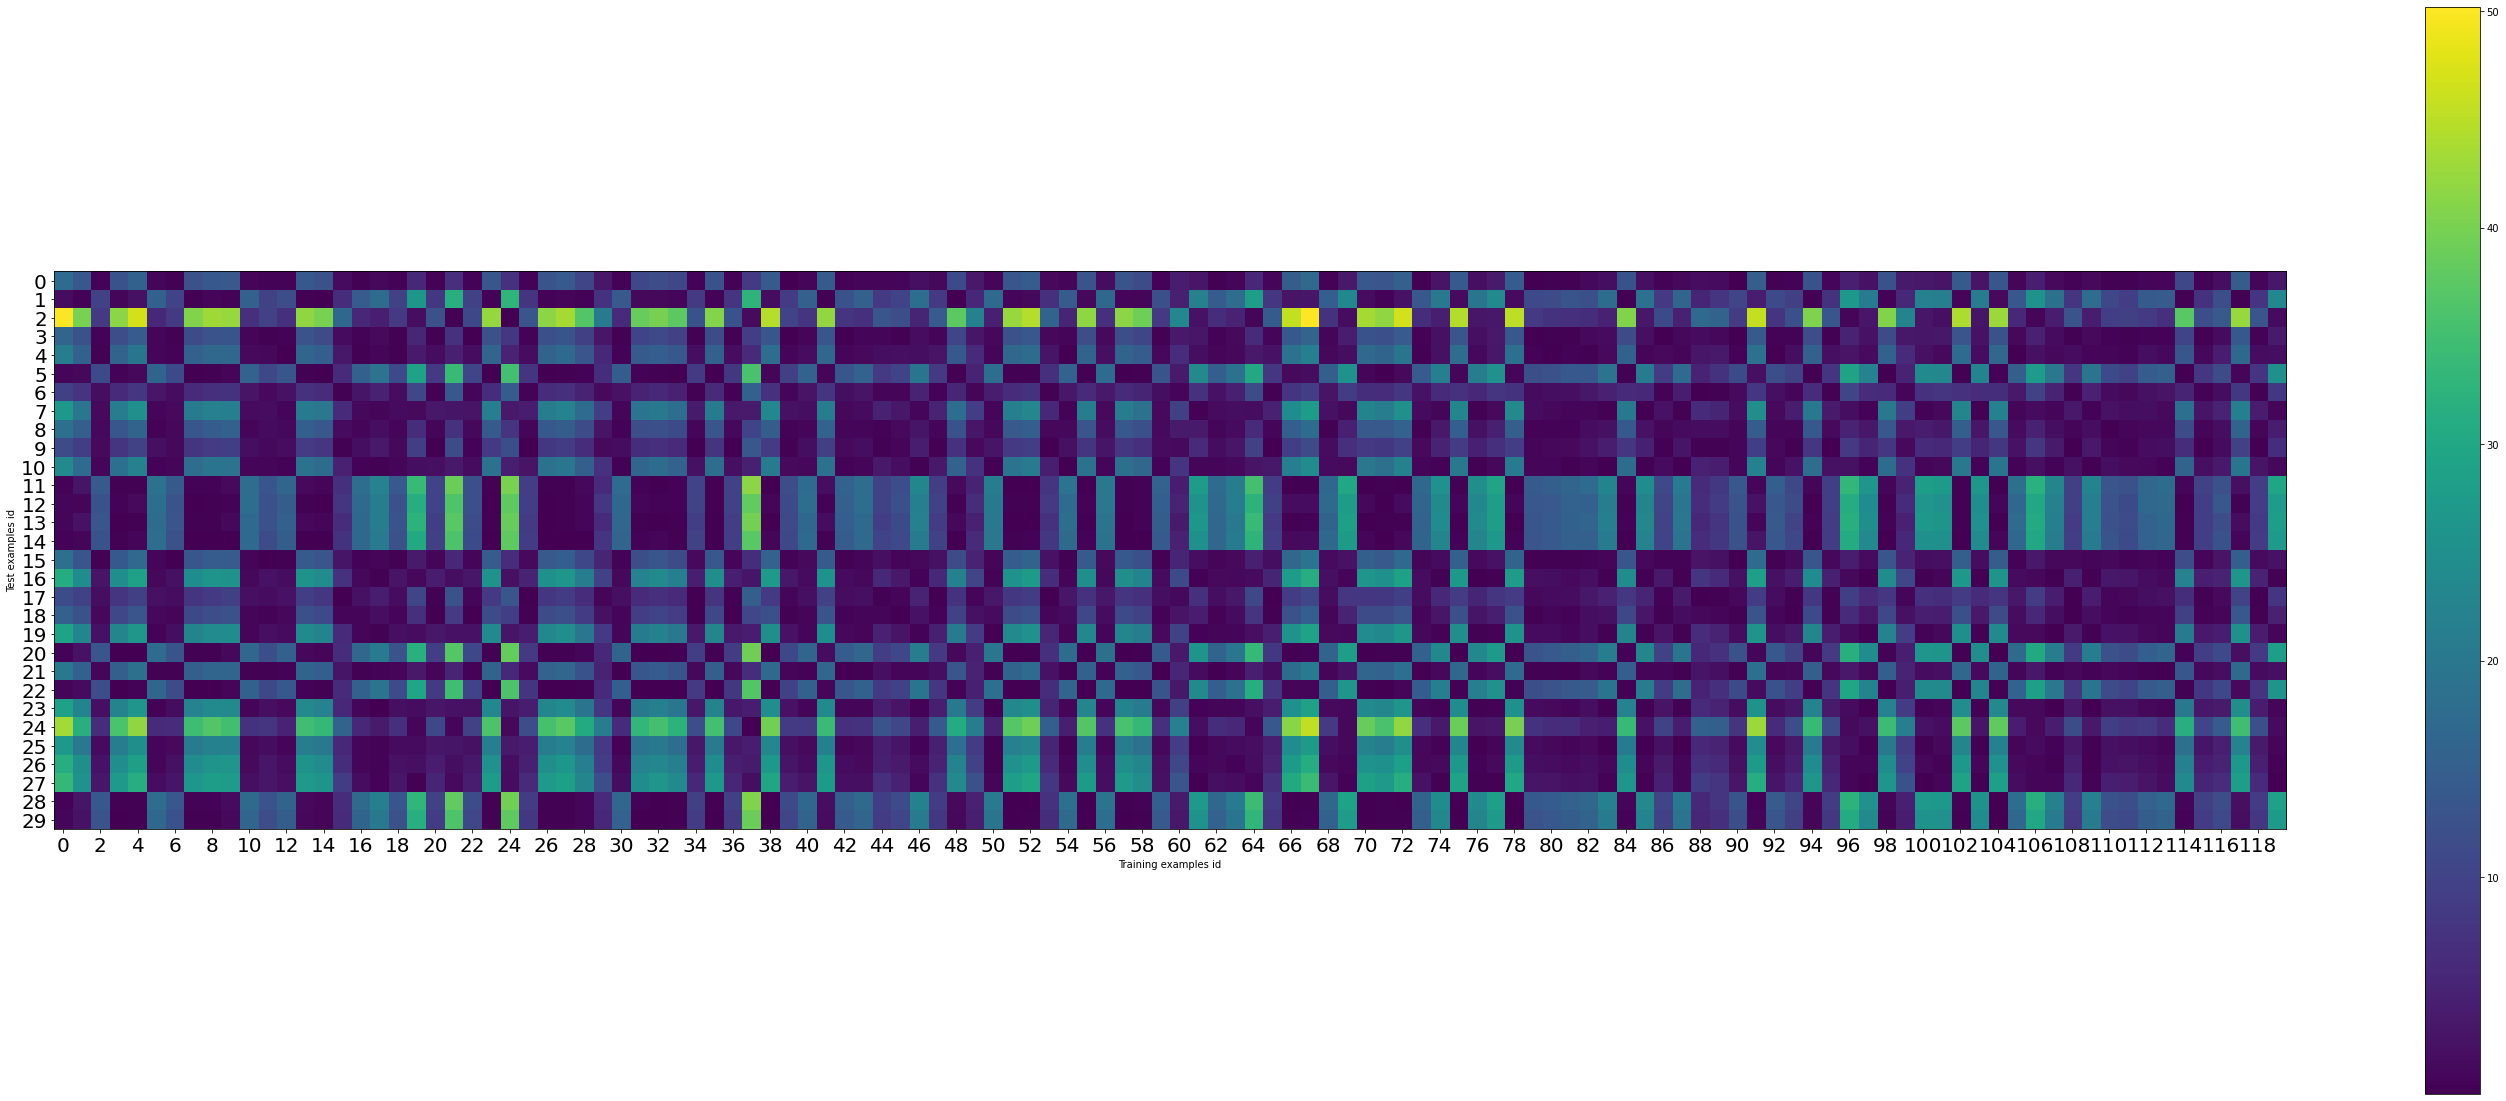

In [148]:
import numpy as np

distances = []
for x_test in X_test:
    distance = np.sum((x_test[np.newaxis, ...] - X_train) ** 2, axis=1)
    distances.append(distance)

distances = np.array(distances)
plt.figure(figsize=(50, 20))
plt.imshow(distances)
plt.colorbar()
plt.xlabel('Training examples id')
plt.ylabel('Test examples id')
plt.xticks(np.arange(0, 120, 2), fontsize=20)
plt.yticks(np.arange(0, 30, 1), fontsize=20)
plt.show

Let's pick a sample from our test set. Now we want to find the 5 closest neighbors of this sample from the training set. Complete the code segment below to find these samples and print out their features (hint: use kneighbors method for KNeighborsClassifier https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) 



In [149]:
from sklearn.neighbors import KNeighborsClassifier

sample = X_test[10]
print('A random sample chosen from the testset:')
print_features(sample, y_test[10])

k=5
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
dists, neighbor_ids = neigh.kneighbors(X=[sample], n_neighbors = 5)

print('\nClosest 5 neighbors to this test sample:')
for knn in range(5):
    print('\nNeighbor %d ===> distance:%f'%(knn, dists[0][knn]))
    print_features(X_train[neighbor_ids[0][knn]], y_train[neighbor_ids[0][knn]])
    

A random sample chosen from the testset:
Iris type: Versicolour
Sepal Length: 6.5 	 Sepal Width: 3.2 	 Petal Length: 5.1 	 Petal Width: 2.0

Closest 5 neighbors to this test sample:

Neighbor 0 ===> distance:0.223607
Iris type: Versicolour
Sepal Length: 6.5 	 Sepal Width: 3.0 	 Petal Length: 5.2 	 Petal Width: 2.0

Neighbor 1 ===> distance:0.374166
Iris type: Versicolour
Sepal Length: 6.4 	 Sepal Width: 3.2 	 Petal Length: 5.3 	 Petal Width: 2.3

Neighbor 2 ===> distance:0.424264
Iris type: Setosa
Sepal Length: 6.7 	 Sepal Width: 3.0 	 Petal Length: 5.0 	 Petal Width: 1.7

Neighbor 3 ===> distance:0.469042
Iris type: Versicolour
Sepal Length: 6.4 	 Sepal Width: 3.1 	 Petal Length: 5.5 	 Petal Width: 1.8

Neighbor 4 ===> distance:0.489898
Iris type: Versicolour
Sepal Length: 6.5 	 Sepal Width: 3.0 	 Petal Length: 5.5 	 Petal Width: 1.8


Let's use the KNN to predict on the whole test set and calculate accuracy

In [150]:
y_pred = neigh.predict(X_test)
accuracy = (y_pred == y_test).mean()
print('test accuracy: %f' % accuracy)

test accuracy: 1.000000


We can calculate the test accuracy with respect to different choices of K for K-nearest neighbors.

In [151]:
# Helper function for calculating accuracy
def accuracy(y_pred, y_test):
    accuracy = (y_pred == y_test).mean()
    return accuracy

In [152]:
test_accs = []
for k in range(1, X_train.shape[0]):
    # Create K nearest neighbors classifier
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    
    # Prediction
    y_pred = neigh.predict(X_test)
    
    # Calculate accuracy
    acc = (y_pred == y_test).mean()
    test_accs.append(acc)

<function matplotlib.pyplot.show(close=None, block=None)>

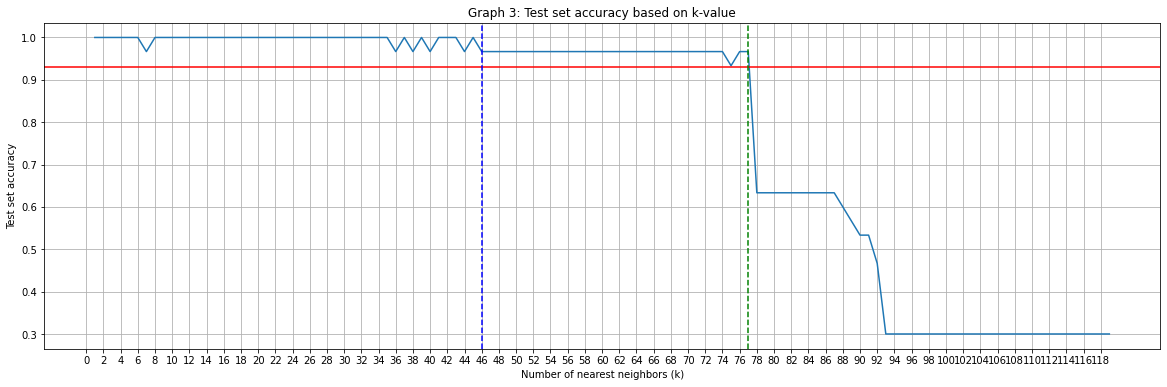

In [163]:
plt.figure(figsize=(20, 6))
plt.plot(list(range(1, X_train.shape[0])), test_accs)
plt.axhline(y=0.93, color='r', linestyle='-')
plt.axvline(x=46, color='b', linestyle='--')
plt.axvline(x=77, color='g', linestyle='--')
plt.xlabel('Number of nearest neighbors (k)')
plt.ylabel('Test set accuracy')
plt.title('Graph 3: Test set accuracy based on k-value')
plt.xticks(np.arange(0, 120, 2), fontsize=10)
plt.grid()
plt.show

### Question 3

1. Train a KNN classifier for the iris data, but this time use all 4 features instead of only 2.   
2. Report on the performance of the model and explain why it is better or worse. What differences do you observe? 

$\color{blue}{\textit Anja's Answer:}$    
*According to Graph 3, the model with four features has a better performance than the model with two features. The red line represents the highest accuracy when working with the two-feature model (~0.93). As can be seen, the four-feature model has a test set accuracy of 1.0 for the majority of the cases where k < 46 (blue dashed line); even after this point the test accuracy is still higher than the max of the two-feature model (red line) up until k = 77 (green dashed line).*    
   
   
*As can be seen in Graph 2, the Petal dimensions add a lot of information and have clearer boundaries (than Graph 1) for the three varieties. Therefore, it makes sense that the accuracy would increase based on how more exact the boundaries are in the two new dimensions.*   
   
   
*It also makes sense when we look at the problem from a purely stand point of an increase in dimensionality. The higher the dimension, the higher your accurate will be. The curse of dimensionality comes into play because it requires a large enough data set to account for data points being further apart the more dimensions added. In this case we have 120 training examples, which seems to be enough data for the 4 features.*
   
   
*Thus with considerations to both reasons, we have an unusually high accuracy of 1.*
